In [1]:
!pip3 install numpy
!pip3 install matplotlib
!pip3 install seaborn
!pip3 install pandas
!pip3 install sklearn
!pip3 install scipy
!pip3 install pydotplus

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.naive_bayes import GaussianNB
import datetime
from pandas.api.types import is_numeric_dtype
import sklearn as skl
from scipy.stats import skewnorm
import scipy.stats as stats
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import pydotplus

# Task 1 – predict species

#### 1. Select the 2 features which allow for the most accurate 2-feature GNB classifier. Explain your selection.

In [2]:
df = pd.read_csv('penguins.csv')

In [3]:
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [4]:
print(set(df["species"]))

{'Gentoo', 'Adelie', 'Chinstrap'}


In [5]:
print(set(df["island"]))

{'Biscoe', 'Dream', 'Torgersen'}


In [6]:
print(set(df["sex"]))

{nan, 'Female', 'Male'}


In [7]:
df.fillna(df.mean(), inplace=True)

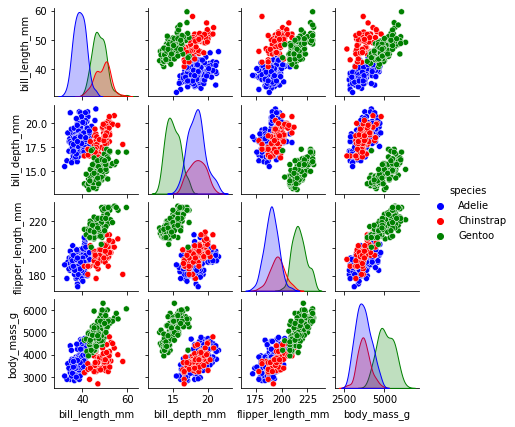

In [8]:
sns.pairplot(df, hue='species', height=1.5,palette=["blue", "red","green"]);

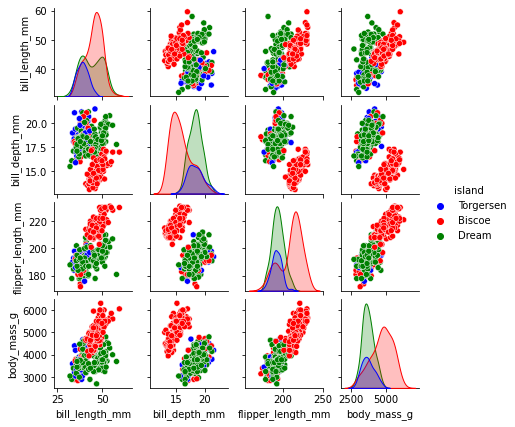

In [9]:
sns.pairplot(df, hue='island', height=1.5,palette=["blue", "red","green"]);

#### As we can see in the plots above, the "species" feature divide better to classes and the most diverse/significant square is the body mass g VS bill_length_mm

#### 2. Train your model using 80% of the data set as your training set.

In [10]:
X_df = df[["body_mass_g","bill_length_mm"]]
print(X_df.shape)
Y_df = df['species']
print(Y_df.shape)

(344, 2)
(344,)


In [11]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_df, Y_df,test_size=0.2,random_state=1)


In [12]:
model = GaussianNB()
model.fit(Xtrain, Ytrain)
Y_model = model.predict(Xtest)

Ypred = pd.Series(Y_model,name="prediction")
predicted = pd.concat([Xtest.reset_index(),Ytest.reset_index(),Ypred],axis=1)
predicted

,index,body_mass_g,bill_length_mm,index,species,prediction
0,306,4600.0,43.4,306,Gentoo,Gentoo
1,341,5750.0,50.4,341,Gentoo,Gentoo
2,291,5000.0,46.4,291,Gentoo,Gentoo
3,102,3075.0,37.7,102,Adelie,Adelie
4,289,5550.0,50.7,289,Gentoo,Gentoo
...,...,...,...,...,...,...
64,89,3600.0,38.9,89,Adelie,Adelie
65,29,3950.0,40.5,29,Adelie,Adelie
66,58,2850.0,36.5,58,Adelie,Adelie
67,212,3950.0,51.9,212,Chinstrap,Chinstrap


In [13]:
print("Accuracy:", metrics.accuracy_score(Ytest, Y_model))

Accuracy: 0.9130434782608695


#### 3. Use a filled contour plot to show the decision distribution of your model (limit your plot axes to the actual data boundaries +-1).

              precision    recall  f1-score   support

      Adelie       0.94      0.94      0.94        34
   Chinstrap       0.89      0.73      0.80        11
      Gentoo       0.88      0.96      0.92        24

    accuracy                           0.91        69
   macro avg       0.90      0.88      0.89        69
weighted avg       0.91      0.91      0.91        69



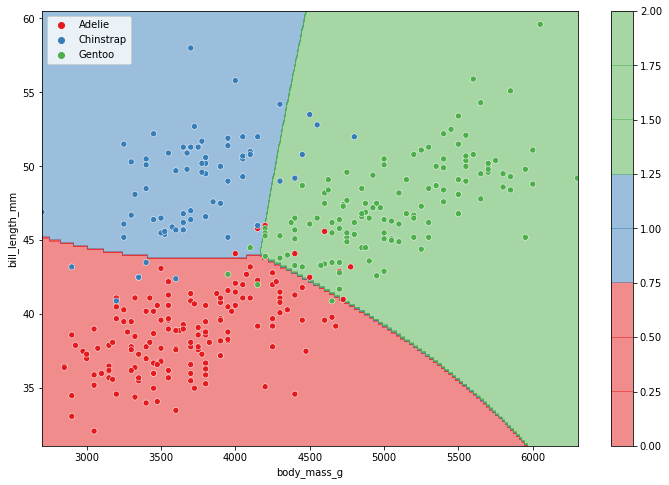

In [14]:
def bayes_plot(df,model="gnb",spread=30):
    
    colors = 'seismic'
    col1 = df.columns[0]
    species = ['Adelie', 'Chinstrap', 'Gentoo']
    col2 = df.columns[1]
    target = df.columns[2]
   

    y = df[target] 
    X = df.drop(target, axis=1)

    clf = GaussianNB()
    if (model != "gnb"):
        clf = DecisionTreeClassifier(max_depth=model)
    clf = clf.fit(Xtrain, Ytrain)


    prob = len(clf.classes_) == 2

    print(metrics.classification_report(Ytest, Ypred))

    hueorder = clf.classes_
    
    x_min, x_max = X.loc[:, col1].min() - 1, X.loc[:, col1].max() + 1
    y_min, y_max = X.loc[:, col2].min() - 1, X.loc[:, col2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                         np.arange(y_min, y_max, 0.2))

    Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    if prob:
        Z = Z[:,1]-Z[:,0]
    else:
        colors = "Set1"
        Z = np.argmax(Z, axis=1)


    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=colors, alpha=0.5)
    plt.colorbar()
    if not prob:
        plt.clim(0,len(clf.classes_)+3)
    plot = sns.scatterplot(data=df[::spread], x=col1, y=col2, hue=target, hue_order=hueorder,palette=colors)
    fig = plt.gcf()
    legends=plt.legend()
    for i, val in enumerate(species):
            legends.get_texts()[i].set_text(val)
    fig.set_size_inches(12, 8)
    plt.show()
bayes_plot(pd.concat([X_df,Y_df],axis=1),spread=1)

#### 4. Overlay a scatter plot containing only the points from the original data set that would have had incorrect predictions given this model above the filled contour plot.

In [15]:
def plot_bayes_prediction(df: pd.DataFrame, model: GaussianNB):
    df.dropna()
    col1 = df.columns[0]
    col2 = df.columns[1]
    target = df.columns[2]
    X = df.drop(target, axis=1)

    x_min, x_max = X.loc[:, col1].min() - 1, X.loc[:, col1].max() + 1
    y_min, y_max = X.loc[:, col2].min() - 1, X.loc[:, col2].max() + 1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                         np.arange(y_min, y_max, 0.2))

    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = np.argmax(Z, axis=1)
    Z = Z.reshape(xx.shape)

    colors = "Set1"
    plt.ylabel('bill_length (mm)')
    plt.xlabel('bill_depth (mm)')
    plt.title('Filled Contours Plot')
    plt.contourf(xx, yy, Z, cmap=colors, alpha=0.5)
    plt.colorbar()
    plt.clim(0, len(model.classes_) + 3)
    
def plot_incorrect_predictions(incorrect_predictions: pd.DataFrame, model:GaussianNB):
    colors = "Set1"
    spread = 1
    col1 = incorrect_predictions.columns[0]
    col2 = incorrect_predictions.columns[1]
    target = incorrect_predictions.columns[2]
    hueorder = model.classes_
    sns.scatterplot(data=incorrect_predictions[::spread], x=col1, y=col2, hue=target, hue_order=hueorder, palette=colors,
                    s=20)
    fig = plt.gcf()
    fig.set_size_inches(12, 8)
    plt.show()
    
    

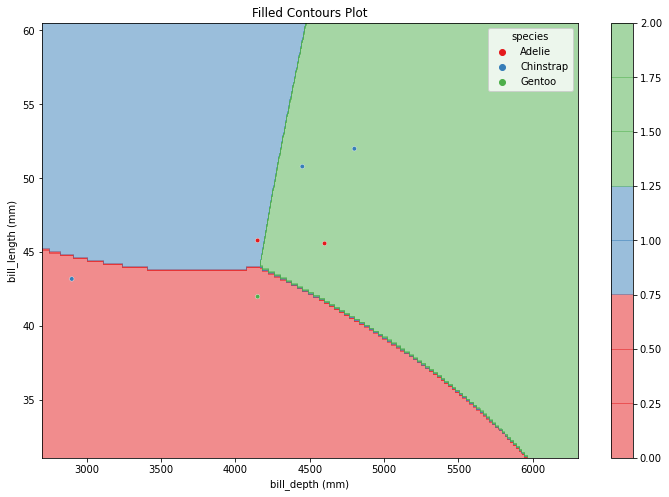

In [16]:
plot_bayes_prediction(pd.concat([X_df, Y_df], axis=1), model)
incorrect_predictions = pd.concat([Xtest, Ytest], axis=1)[np.array(Ytest) != np.array(Y_model)]
plot_incorrect_predictions(incorrect_predictions, model)

#### 5. Include the classification report for your model with regards to the test set.

In [17]:
print(metrics.classification_report(Ytest,Ypred))

              precision    recall  f1-score   support

      Adelie       0.94      0.94      0.94        34
   Chinstrap       0.89      0.73      0.80        11
      Gentoo       0.88      0.96      0.92        24

    accuracy                           0.91        69
   macro avg       0.90      0.88      0.89        69
weighted avg       0.91      0.91      0.91        69



# Task 2

#### 1. Create a new column named “class” in the data set which is a combination of the “sex” and “species” category

In [18]:
df["class"] = df["sex"] + " " + df["species"]

In [19]:
print(set(df["class"]))

{nan, 'Male Chinstrap', 'Male Gentoo', 'Female Chinstrap', 'Male Adelie', 'Female Gentoo', 'Female Adelie'}


In [20]:
df.dropna(inplace=True)
print(set(df["class"]))

{'Male Chinstrap', 'Male Gentoo', 'Female Chinstrap', 'Female Gentoo', 'Male Adelie', 'Female Adelie'}


#### 2. Repeat task 1 using “class” as your target class.

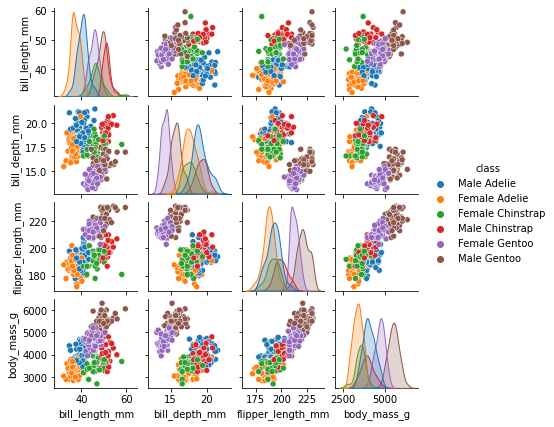

In [21]:
sns.pairplot(df, hue='class', height=1.5);

#### As we can see in the plot above, the most diverse/significant square is the bill_depth_mm VS bill_length_mm

In [22]:
X_df = df[["bill_length_mm","bill_depth_mm"]]
print(X_df.shape)
Y_df = df['class']
print(Y_df.shape)

(333, 2)
(333,)


In [23]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X_df, Y_df,test_size=0.2,random_state=1)


In [24]:
model = GaussianNB()
model.fit(Xtrain, Ytrain)
Y_model = model.predict(Xtest)

Ypred = pd.Series(Y_model,name="prediction")
predicted = pd.concat([Xtest.reset_index(),Ytest.reset_index(),Ypred],axis=1)
predicted
print("Accuracy:", metrics.accuracy_score(Ytest, Y_model))

Accuracy: 0.8507462686567164


### predictions

                  precision    recall  f1-score   support

   Female Adelie       0.90      0.90      0.90        10
Female Chinstrap       0.50      0.71      0.59         7
   Female Gentoo       1.00      0.93      0.96        14
     Male Adelie       0.94      0.94      0.94        18
  Male Chinstrap       0.88      0.70      0.78        10
     Male Gentoo       0.75      0.75      0.75         8

        accuracy                           0.85        67
       macro avg       0.83      0.82      0.82        67
    weighted avg       0.87      0.85      0.86        67



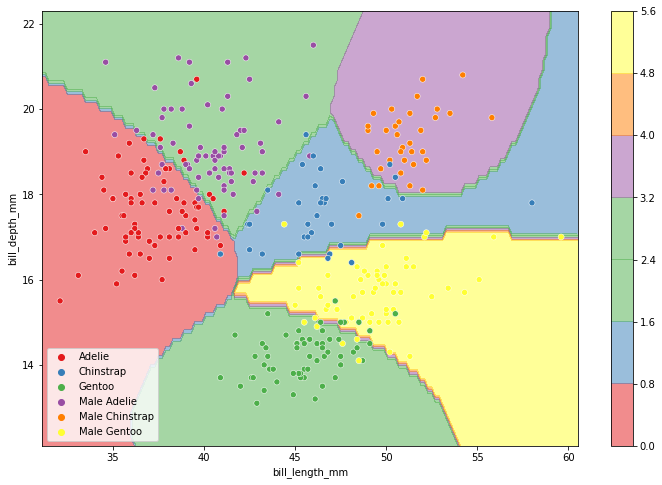

In [25]:
bayes_plot(pd.concat([X_df,Y_df],axis=1),spread=1)

### incorrect predictions

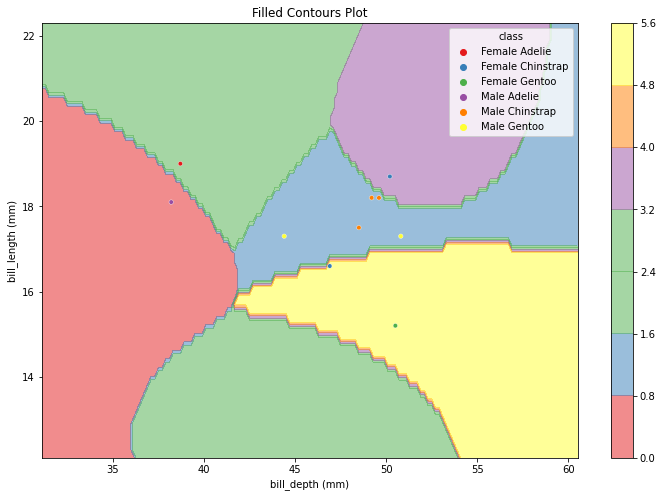

In [26]:
plot_bayes_prediction(pd.concat([X_df, Y_df], axis=1), model)
incorrect_predictions = pd.concat([Xtest, Ytest], axis=1)[np.array(Ytest) != np.array(Y_model)]
plot_incorrect_predictions(incorrect_predictions, model)
